# Polynomial Regression (Death rate)

---
* author:  [Prasert Kanawattanachai](prasert.k@chula.ac.th)
* YouTube: https://www.youtube.com/prasertcbs
* github: https://github.com/prasertcbs/
* [Chulalongkorn Business School](https://www.cbs.chula.ac.th/en/)
---

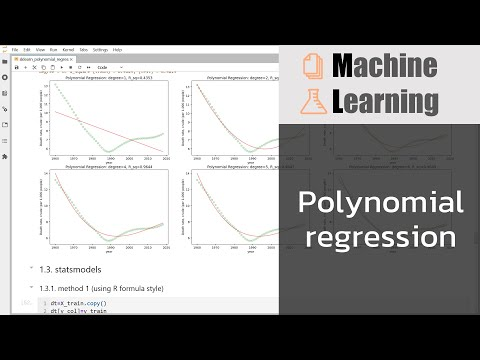

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('3ha-ART9DFA', width=720, height=405)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [3]:
print(f'pandas  version = {pd.__version__}')
print(f'numpy   version = {np.__version__}')
print(f'seaborn version = {sns.__version__}')
print(pd.Timestamp.now())

pandas  version = 1.1.5
numpy   version = 1.19.2
seaborn version = 0.11.1
2021-01-05 07:19:52.143960


In [4]:
url='https://github.com/prasertcbs/basic-dataset/raw/master/worldbank_gdp_gini_birth_death_suicide_rate.csv'
data=pd.read_csv(url)
data.sample(10)

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
12265,Serbia,2012,1.003114e+11,39.9,9.300000,14.200000,NaN
2590,Chile,2013,3.942919e+11,45.8,14.002000,5.785000,NaN
1058,Barbados,2015,4.425610e+09,NaN,10.806000,8.789000,0.7
10544,North Macedonia,2002,1.291925e+10,NaN,12.406000,8.470000,NaN
11041,Palau,1968,NaN,NaN,NaN,NaN,NaN
10560,North Macedonia,2018,3.455297e+10,NaN,10.811000,10.051000,NaN
5664,Guyana,1960,NaN,NaN,43.020000,10.066000,NaN
2234,Caribbean small states,2011,1.063705e+11,NaN,17.346223,7.271759,NaN
7705,Latin America & Caribbean,1995,3.630164e+12,NaN,24.567073,6.279350,NaN
11336,Philippines,1968,NaN,NaN,40.112000,8.153000,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15576 entries, 0 to 15575
Data columns (total 7 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   country                                          15576 non-null  object 
 1   year                                             15576 non-null  int64  
 2   GDP, PPP (current international $)               6726 non-null   float64
 3   Gini index (World Bank estimate)                 1649 non-null   float64
 4   Birth rate, crude (per 1,000 people)             14515 non-null  float64
 5   Death rate, crude (per 1,000 people)             14492 non-null  float64
 6   Suicide mortality rate (per 100,000 population)  1145 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 851.9+ KB


## filter and visualize `country` data

In [6]:
data[data['country'].str.contains('Thailand')][:3]

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN


In [7]:
x_col='year'
y_col='Death rate, crude (per 1,000 people)'
# y_col='Birth rate, crude (per 1,000 people)'
country='Thailand'

In [8]:
df=data[data['country']==country].copy()
df

,country,year,"GDP, PPP (current international $)",Gini index (World Bank estimate),"Birth rate, crude (per 1,000 people)","Death rate, crude (per 1,000 people)","Suicide mortality rate (per 100,000 population)"
13983,Thailand,1960,NaN,NaN,42.735,13.180,NaN
13984,Thailand,1961,NaN,NaN,42.617,12.853,NaN
13985,Thailand,1962,NaN,NaN,42.469,12.534,NaN
13986,Thailand,1963,NaN,NaN,42.283,12.226,NaN
13987,Thailand,1964,NaN,NaN,42.041,11.929,NaN
13988,Thailand,1965,NaN,NaN,41.708,11.639,NaN
13989,Thailand,1966,NaN,NaN,41.244,11.346,NaN
13990,Thailand,1967,NaN,NaN,40.625,11.046,NaN
13991,Thailand,1968,NaN,NaN,39.845,10.733,NaN
13992,Thailand,1969,NaN,NaN,38.912,10.408,NaN


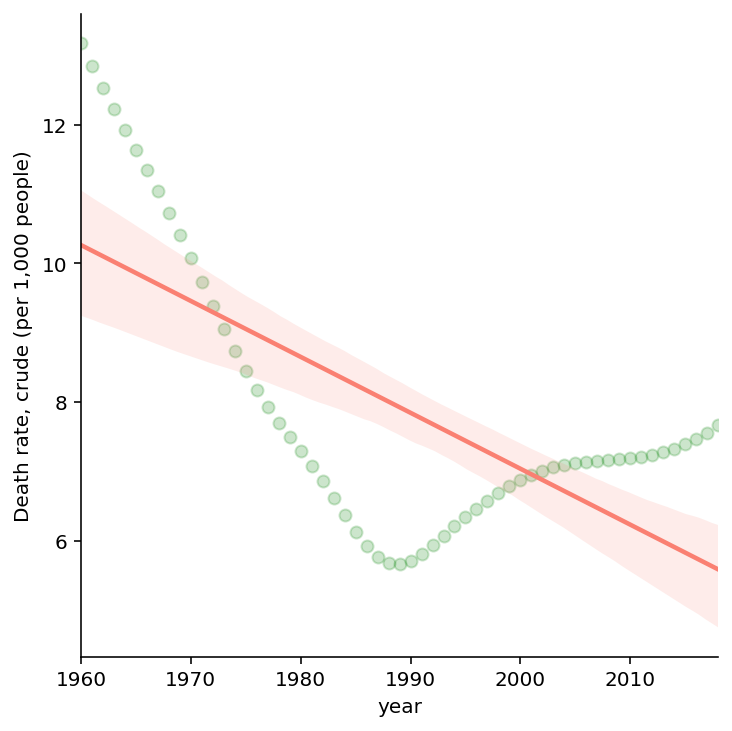

In [9]:
sns.lmplot(x=x_col, y=y_col, data=df, fit_reg=True, 
           scatter_kws={'alpha': .2, 'color': 'green'},
           line_kws={'color': 'salmon'});

## scikit-learn

In [10]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [11]:
print(f'sklearn  version = {sk.__version__}')

sklearn  version = 0.23.2


In [12]:
X=df[[x_col]]
y=df[y_col]

In [13]:
X[:3]

,year
13983,1960
13984,1961
13985,1962


In [14]:
y[:3]

13983    13.180
13984    12.853
13985    12.534
Name: Death rate, crude (per 1,000 people), dtype: float64

In [15]:
test_size=.2
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=test_size, 
                                                    random_state=1)

### linear regression
**`simple regression model`**
$$
{y=\beta _{0}+\beta _{1}x+\varepsilon}
$$

In [16]:
lm = LinearRegression()
lm

LinearRegression()

In [17]:
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
lm.score(X_train, y_train) # R-squared

0.4353052622557838

In [19]:
lm.coef_

array([-0.07661316])

In [20]:
lm.intercept_

160.2761622766295

In [21]:
lm.score(X_test, y_test) # R-squared

0.5856015176097807

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

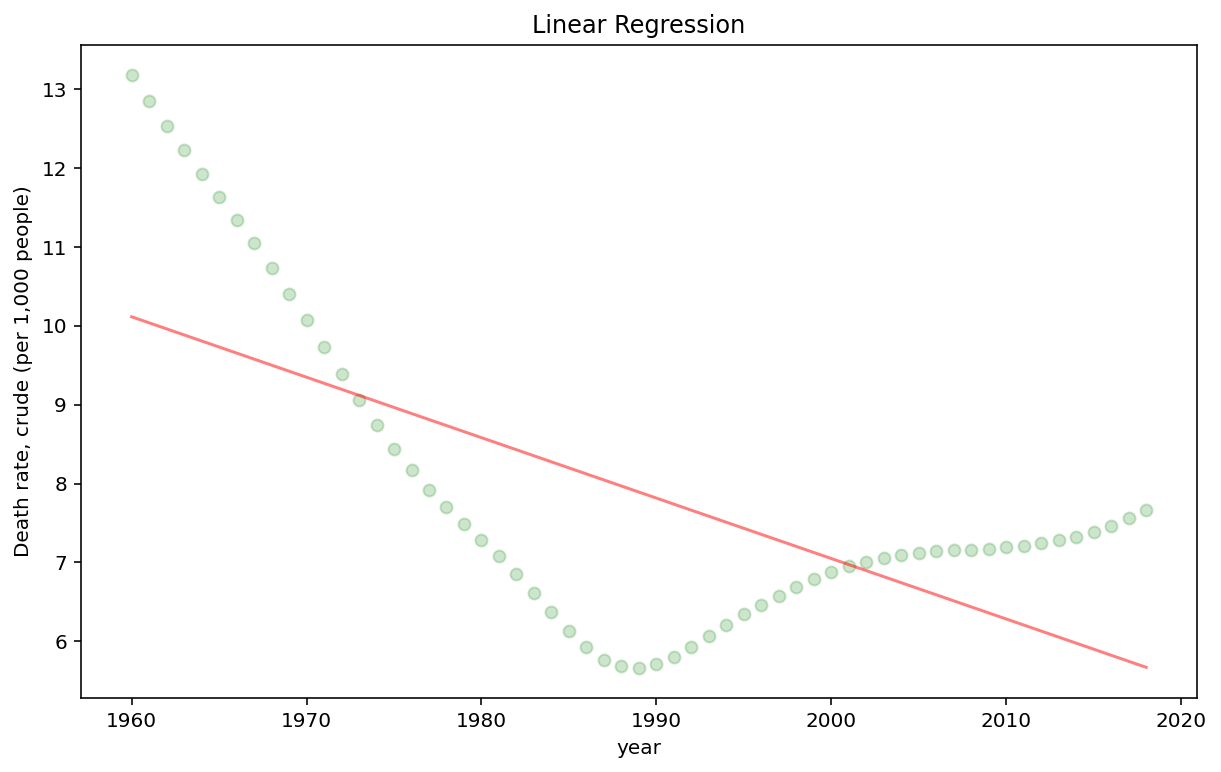

In [22]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, lm.predict(X), color = 'red', alpha=.5)
plt.title('Linear Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

In [23]:
lm.predict([[1990], 
            [2021]])

array([7.81597278, 5.44096481])

### polynomial regression

**`simple regression model`**
$$
{y=\beta _{0}+\beta _{1}x+\varepsilon}
$$

**`general polynomial regression model`**
$$
{y=\beta _{0}+\beta _{1}x^{1}+\beta _{2}x^{2}+\beta _{3}x^{3}+\cdots +\beta _{n}x^{n}+\varepsilon .\,}
$$

In [24]:
poly = PolynomialFeatures(degree=2)

In [25]:
poly.fit_transform([[1990]])

array([[1.0000e+00, 1.9900e+03, 3.9601e+06]])

In [26]:
poly.get_feature_names()

['1', 'x0', 'x0^2']

In [27]:
v=1990
v**0, v**1, v**2

(1, 1990, 3960100)

In [28]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [29]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)

In [30]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [31]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [32]:
pm = LinearRegression()
pm.fit(X_train_poly, y_train)

LinearRegression()

In [33]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367774

In [34]:
pm.intercept_

21619.435397578196

In [35]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [36]:
pm.score(X_test_poly, y_test) # R-squared

0.9491064757455792

In [37]:
X_train[:3]

,year
14019,1996
14023,2000
14007,1984


In [38]:
X_train_poly[:3]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06]])

In [39]:
pm.intercept_ + sum((pm.coef_ * X_train_poly[0]))

5.974124829564971

In [40]:
pm.predict(X_train_poly[:3])

array([5.97412483, 6.0303033 , 6.84646291])

In [41]:
pm.predict(poly.fit_transform([[1996]]))

array([5.97412483])

In [42]:
pm.predict(poly.fit_transform([[1996], [2000], [1984]]))

array([5.97412483, 6.0303033 , 6.84646291])

In [43]:
def predict(intercept, coef, x):
    v=intercept
    for p in range(len(coef)):
       v += x ** p * coef[p]
    return v

In [44]:
predict(pm.intercept_, pm.coef_, 1996)

5.974124829564971

Text(0, 0.5, 'Death rate, crude (per 1,000 people)')

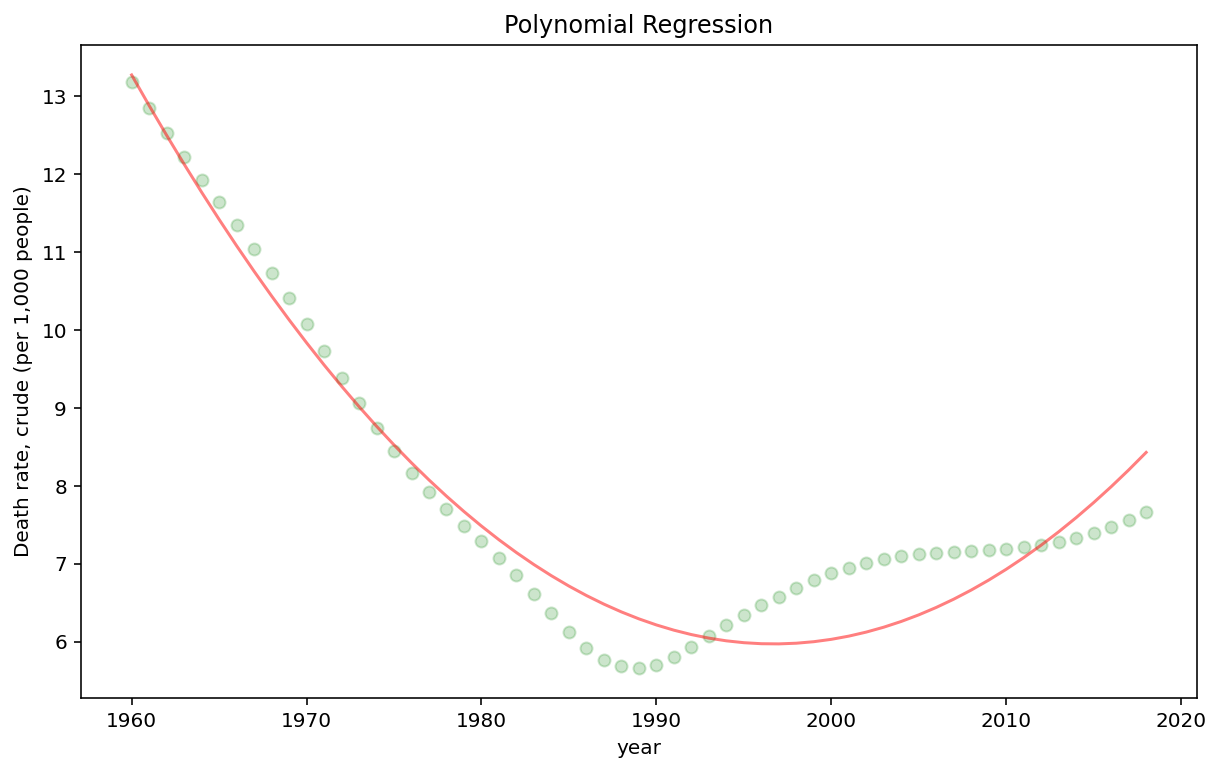

In [45]:
fig = plt.figure(figsize=(10, 6))
plt.scatter(X, y, color = 'green', alpha=.2)
plt.plot(X, pm.predict(poly.fit_transform(X)), color = 'red', alpha=.5)
plt.title('Polynomial Regression')
plt.xlabel(x_col)
plt.ylabel(y_col)

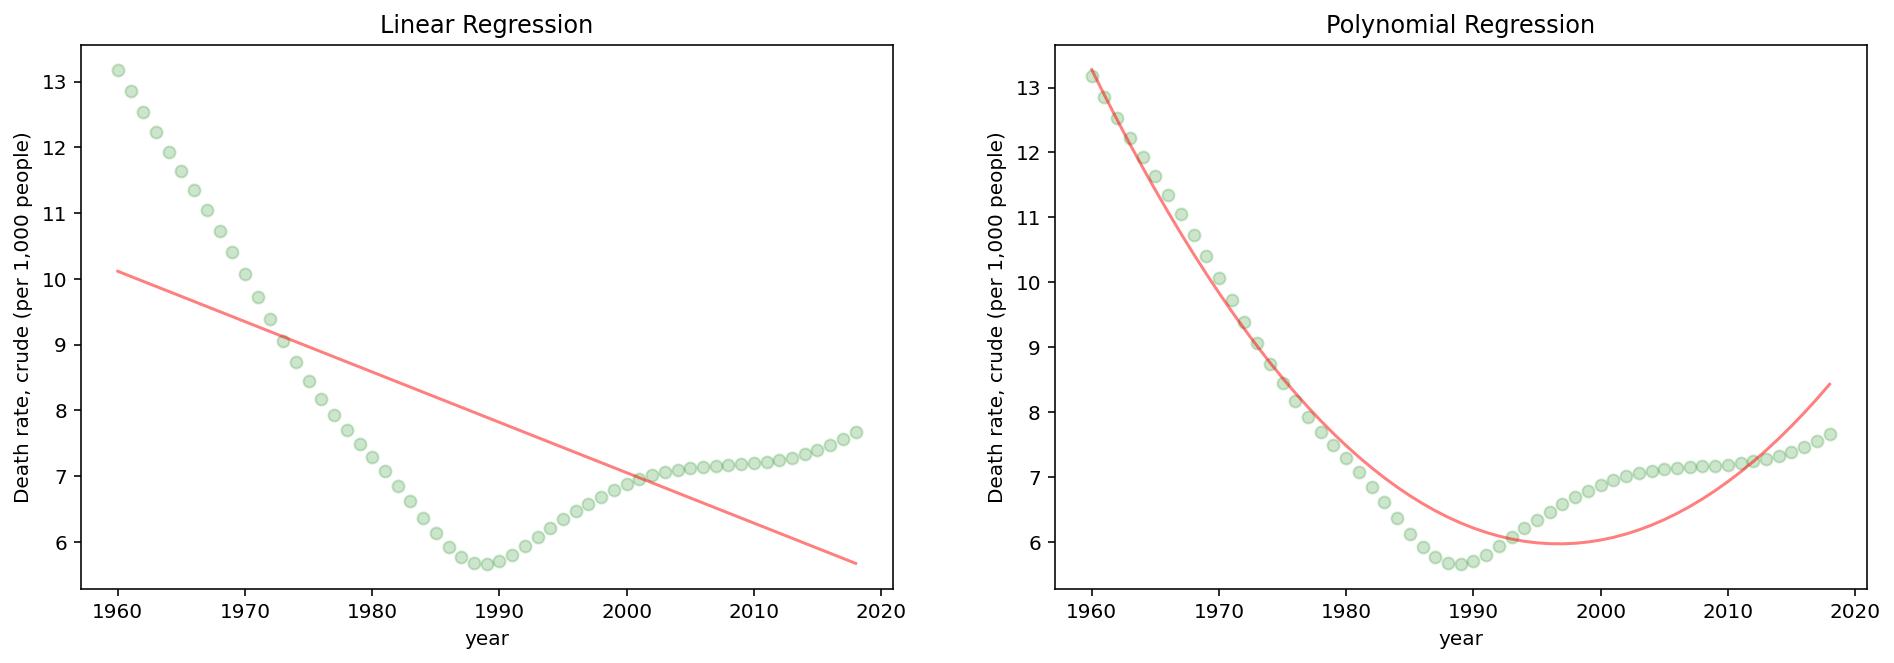

In [46]:
fig = plt.figure(figsize=(8 * 2, 5))
d={'Linear Regression': lm.predict(X),
   'Polynomial Regression': pm.predict(poly.fit_transform(X))}
i=1
for title, y_pred in d.items():
    fig.add_subplot(1, 2, i)
    plt.scatter(X, y, color = 'green', alpha=.2)
    plt.plot(X, y_pred, color = 'red', alpha=.5)
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    i += 1

### Plot varying by degree

degree = 1: R_square (train) = 0.4353, (test) = 0.5856
degree = 2: R_square (train) = 0.9448, (test) = 0.9491
degree = 3: R_square (train) = 0.9641, (test) = 0.9814
degree = 4: R_square (train) = 0.9644, (test) = 0.9815
degree = 5: R_square (train) = 0.9647, (test) = 0.9817
degree = 6: R_square (train) = 0.9649, (test) = 0.9819


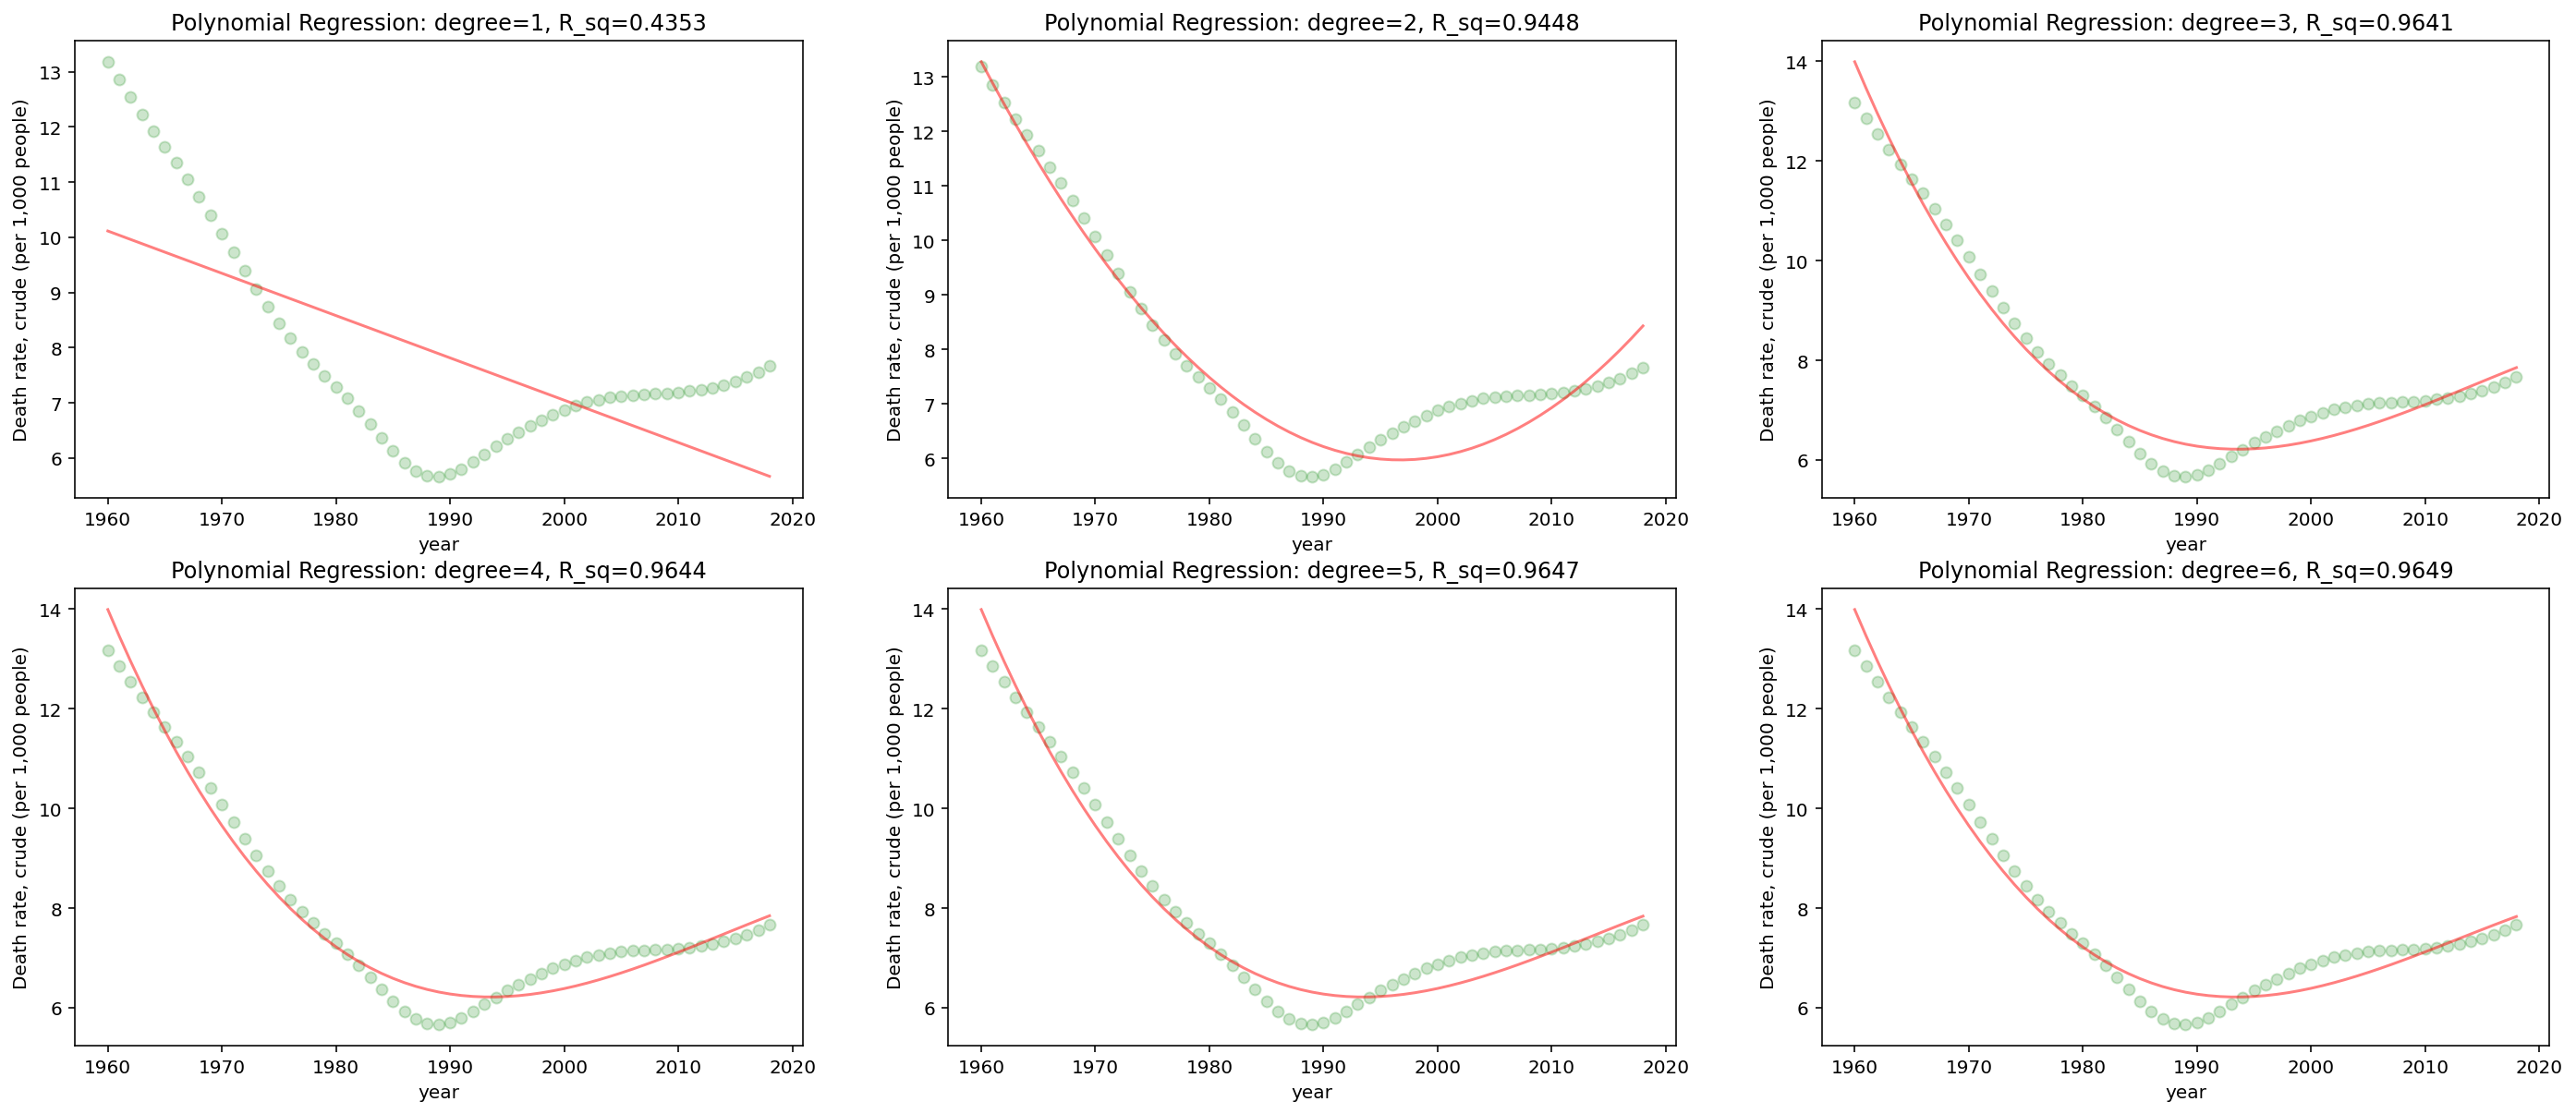

In [47]:
def plots(degree_ranges=range(2, 8)):
    import math
    n=len(degree_ranges)
    n_rows=2
    n_cols=math.ceil(n / n_rows)
    fig = plt.figure(figsize=(8 * n_cols, 5 * n_rows))
    i=1
    for degree in degree_ranges:
        poly = PolynomialFeatures(degree = degree)
        X_train_poly = poly.fit_transform(X_train)
        X_test_poly = poly.fit_transform(X_test)

        poly.fit(X_train_poly, y_train)
        pm = LinearRegression()
        pm.fit(X_train_poly, y_train)
        rsq_train=pm.score(X_train_poly, y_train) # R-squared
        rsq_test=pm.score(X_test_poly, y_test) # R-squared
        print(f'degree = {degree}: R_square (train) = {rsq_train:.4f}, (test) = {rsq_test:.4f}')
#         print(pm.coef_)
        
        fig.add_subplot(n_rows, n_cols, i)
        y_pred=pm.predict(poly.fit_transform(X))
        plt.scatter(X, y, color = 'green', alpha=.2)
        plt.plot(X, y_pred, color = 'red', alpha=.5)
        plt.title(f'Polynomial Regression: degree={degree}, R_sq={rsq_train:.4f}')
        plt.xlabel(x_col)
        plt.ylabel(y_col)
        i += 1
#     plt.show()

plots(range(1, 7))

## statsmodels

### method 1 (using R formula style)

In [48]:
dt=X_train.copy()
dt[y_col]=y_train
dt[:5]

,year,"Death rate, crude (per 1,000 people)"
14019,1996,6.465
14023,2000,6.877
14007,1984,6.367
13993,1970,10.072
14034,2011,7.213


In [49]:
dt.columns=['year', 'death_rate']

In [50]:
import statsmodels.formula.api as smf
formula = 'death_rate ~ year + I(year**2)'
# formula = 'death_rate ~ year + I(year**2) + I(year**3)'
model1 = smf.ols(formula=formula, data=dt)
model1_fit=model1.fit()

In [51]:
model1_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     376.8
Date:                Tue, 05 Jan 2021   Prob (F-statistic):           2.08e-28
Time:                        07:19:57   Log-Likelihood:                -30.931
No. Observations:                  47   AIC:                             67.86
Df Residuals:                      44   BIC:                             73.41
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     2.162e+04   1064.573     20.308      0.000    1.95e+04    2.38e+04
year           -21.6491      1.070    -20.230      0.000     -23.806     -19.492
I(year ** 2)     0.0054      0.000     20.158      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.767
Skew:                           0.272   Prob(JB):                        0.413
Kurtosis:                       2.222   Cond. No.                     5.98e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
pm.intercept_

21619.435397578196

In [53]:
pm.coef_

array([ 0.00000000e+00, -2.16491346e+01,  5.42121601e-03])

In [54]:
pm.score(X_train_poly, y_train) # R-squared

0.9448282949367774

In [55]:
X_train[:5]

,year
14019,1996
14023,2000
14007,1984
13993,1970
14034,2011


In [56]:
model1.exog[:5]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [57]:
X_train_poly[:5]

array([[1.000000e+00, 1.996000e+03, 3.984016e+06],
       [1.000000e+00, 2.000000e+03, 4.000000e+06],
       [1.000000e+00, 1.984000e+03, 3.936256e+06],
       [1.000000e+00, 1.970000e+03, 3.880900e+06],
       [1.000000e+00, 2.011000e+03, 4.044121e+06]])

In [58]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64

In [59]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

### method 2 (use sm.OLS)

In [60]:
import statsmodels.api as sm

model2 = sm.OLS(y_train, X_train_poly)

model2_fit=model2.fit()
model2_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     OLS Regression Results                                     
================================================================================================
Dep. Variable:     Death rate, crude (per 1,000 people)   R-squared:                       0.945
Model:                                              OLS   Adj. R-squared:                  0.942
Method:                                   Least Squares   F-statistic:                     376.8
Date:                                  Tue, 05 Jan 2021   Prob (F-statistic):           2.08e-28
Time:                                          07:19:57   Log-Likelihood:                -30.931
No. Observations:                                    47   AIC:                             67.86
Df Residuals:                                        44   BIC:                             73.41
Df Model:                                             2                                         
Covariance Type:                              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.162e+04   1064.573     20.308      0.000    1.95e+04    2.38e+04
x1           -21.6491      1.070    -20.230      0.000     -23.806     -19.492
x2             0.0054      0.000     20.158      0.000       0.005       0.006
==============================================================================
Omnibus:                        2.525   Durbin-Watson:                   1.803
Prob(Omnibus):                  0.283   Jarque-Bera (JB):                1.767
Skew:                           0.272   Prob(JB):                        0.413
Kurtosis:                       2.222   Cond. No.                     5.98e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.98e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
model2_fit.predict(X_train_poly[:5])

array([5.97412487, 6.03030333, 6.84646295, 9.83751333, 7.07929476])

In [62]:
pm.predict(X_train_poly[:5])

array([5.97412483, 6.0303033 , 6.84646291, 9.83751329, 7.07929472])

In [63]:
model1_fit.predict(dt['year'][:5])

14019    5.974125
14023    6.030303
14007    6.846463
13993    9.837513
14034    7.079295
dtype: float64